In [26]:
import pandas as pd

# Load the dataset
file_path = r'battles_data_cleaned.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,turn,language,is_code,is_refusal,model,sum_user_tokens,sum_assistant_tokens,context_tokens,dedup_tag_high_freq,dedup_tag_sampled,tstamp_period,information_fulfillment,Math,specificity,domain_knowledge,complexity,problem_solving,creativity,technical_accuracy,real_world
0,1,French,False,False,gemma-2-2b-it,19,328,19,False,True,2024-08-04,True,False,True,True,False,True,True,False,True
1,3,English,False,False,athene-70b-0725,51,1846,1434,False,True,2024-08-04,True,False,True,True,True,True,False,True,True
2,6,Italian,False,False,athene-70b-0725,472,3504,3396,False,True,2024-08-04,False,False,False,True,False,True,True,True,True
3,2,English,False,False,llama-3-70b-instruct,84,1047,580,False,True,2024-08-04,True,False,True,True,False,True,False,True,True
4,1,French,False,False,gpt-4-turbo-2024-04-09,29,556,29,False,True,2024-08-04,False,False,True,True,False,False,False,True,True


In [ ]:
# Get the value counts for the 'model' column
model_value_counts = data['model'].value_counts()

# Display the value counts
print(model_value_counts)

model
chatgpt-4o-latest                   9099
gpt-4o-2024-08-06                   5395
llama-3.1-405b-instruct             3557
gemini-1.5-pro-exp-0801             3427
gpt-4o-2024-05-13                   3340
llama-3.1-70b-instruct              3321
claude-3-5-sonnet-20240620          3219
mistral-large-2407                  3113
gemini-1.5-pro-api-0514             3030
gpt-4o-mini-2024-07-18              2535
llama-3.1-8b-instruct               2486
reka-core-20240722                  2465
reka-flash-20240722                 2334
athene-70b-0725                     2264
gpt-4-turbo-2024-04-09              2047
claude-3-opus-20240229              1939
gemini-1.5-flash-api-0514           1927
gemma-2-27b-it                      1844
deepseek-v2-api-0628                1777
gemma-2-2b-it                       1600
llama-3-70b-instruct                1089
gpt-4-0125-preview                  1002
gpt-4-1106-preview                   991
deepseek-coder-v2-0724               987
claude-3-h

In [28]:
import pandas as pd

# Filter models with counts greater than or equal to 1000
model_counts = data['model'].value_counts()
models_to_keep = model_counts[model_counts >= 1000].index

# Filter the data to include only the rows with these models
filtered_data = data[data['model'].isin(models_to_keep)]

# Display the first few rows of the filtered data
filtered_data.head()


,turn,language,is_code,is_refusal,model,sum_user_tokens,sum_assistant_tokens,context_tokens,dedup_tag_high_freq,dedup_tag_sampled,tstamp_period,information_fulfillment,Math,specificity,domain_knowledge,complexity,problem_solving,creativity,technical_accuracy,real_world
0,1,French,False,False,gemma-2-2b-it,19,328,19,False,True,2024-08-04,True,False,True,True,False,True,True,False,True
1,3,English,False,False,athene-70b-0725,51,1846,1434,False,True,2024-08-04,True,False,True,True,True,True,False,True,True
2,6,Italian,False,False,athene-70b-0725,472,3504,3396,False,True,2024-08-04,False,False,False,True,False,True,True,True,True
3,2,English,False,False,llama-3-70b-instruct,84,1047,580,False,True,2024-08-04,True,False,True,True,False,True,False,True,True
4,1,French,False,False,gpt-4-turbo-2024-04-09,29,556,29,False,True,2024-08-04,False,False,True,True,False,False,False,True,True


In [29]:
filtered_data.shape

(62810, 20)

In [30]:


# Get the value counts for the 'model' column
model_value_counts = filtered_data['model'].value_counts()

# Display the value counts
print(len(model_value_counts))

22


In [31]:
import pandas as pd
from sklearn.utils import resample

# Filter models with counts greater than or equal to 1000
model_counts = data['model'].value_counts()
models_to_keep = model_counts[model_counts >= 1000].index

# Create an empty DataFrame to store the balanced data
balanced_data = pd.DataFrame()

# Iterate through each unique model and perform sampling
for model in models_to_keep:
    model_data = data[data['model'] == model]
    if len(model_data) > 4000:
        # Undersample if there are more than 2000 samples
        model_sample = resample(model_data, replace=False, n_samples=4000, random_state=42)
    else:
        # Oversample if there are less than 2000 samples
        model_sample = resample(model_data, replace=True, n_samples=4000, random_state=42)
    
    # Append the sampled data to the balanced_data DataFrame
    balanced_data = pd.concat([balanced_data, model_sample], ignore_index=True)

# Display the first few rows of the balanced data
balanced_data.head()


,turn,language,is_code,is_refusal,model,sum_user_tokens,sum_assistant_tokens,context_tokens,dedup_tag_high_freq,dedup_tag_sampled,tstamp_period,information_fulfillment,Math,specificity,domain_knowledge,complexity,problem_solving,creativity,technical_accuracy,real_world
0,1,Persian,False,False,chatgpt-4o-latest,92,227,92,False,True,2024-08-09,False,False,False,True,False,False,True,False,True
1,2,English,False,True,chatgpt-4o-latest,1880,2504,2877,False,True,2024-08-08,True,False,True,True,False,True,True,True,True
2,1,English,False,False,chatgpt-4o-latest,8,806,8,False,True,2024-08-10,False,True,True,True,True,True,False,True,True
3,1,English,False,False,chatgpt-4o-latest,7,78,7,False,True,2024-08-08,False,False,False,False,False,False,False,False,False
4,1,English,False,False,chatgpt-4o-latest,36,83,36,False,True,2024-08-11,True,False,True,True,False,False,True,True,True


In [32]:

# Get the value counts for the 'model' column
model_value_counts = balanced_data['model'].value_counts()

# Display the value counts
print(model_value_counts)

model
chatgpt-4o-latest             4000
gpt-4o-2024-08-06             4000
llama-3-70b-instruct          4000
gemma-2-2b-it                 4000
deepseek-v2-api-0628          4000
gemma-2-27b-it                4000
gemini-1.5-flash-api-0514     4000
claude-3-opus-20240229        4000
gpt-4-turbo-2024-04-09        4000
athene-70b-0725               4000
reka-flash-20240722           4000
reka-core-20240722            4000
llama-3.1-8b-instruct         4000
gpt-4o-mini-2024-07-18        4000
gemini-1.5-pro-api-0514       4000
mistral-large-2407            4000
claude-3-5-sonnet-20240620    4000
llama-3.1-70b-instruct        4000
gpt-4o-2024-05-13             4000
gemini-1.5-pro-exp-0801       4000
llama-3.1-405b-instruct       4000
gpt-4-0125-preview            4000
Name: count, dtype: int64


In [33]:
output_file_path = r'C:\Users\yoges\DM project\final_dataset1.csv'
balanced_data.to_csv(output_file_path, index=False)
output_file_path

'C:\\Users\\yoges\\DM project\\final_dataset1.csv'

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

resampled_data = pd.read_csv(r"C:\Users\yoges\DM project\final_dataset1.csv")

# Display the first few rows to confirm successful import
resampled_data.head()

,turn,language,is_code,is_refusal,model,sum_user_tokens,sum_assistant_tokens,context_tokens,dedup_tag_high_freq,dedup_tag_sampled,tstamp_period,information_fulfillment,Math,specificity,domain_knowledge,complexity,problem_solving,creativity,technical_accuracy,real_world
0,1,Persian,False,False,chatgpt-4o-latest,92,227,92,False,True,2024-08-09,False,False,False,True,False,False,True,False,True
1,2,English,False,True,chatgpt-4o-latest,1880,2504,2877,False,True,2024-08-08,True,False,True,True,False,True,True,True,True
2,1,English,False,False,chatgpt-4o-latest,8,806,8,False,True,2024-08-10,False,True,True,True,True,True,False,True,True
3,1,English,False,False,chatgpt-4o-latest,7,78,7,False,True,2024-08-08,False,False,False,False,False,False,False,False,False
4,1,English,False,False,chatgpt-4o-latest,36,83,36,False,True,2024-08-11,True,False,True,True,False,False,True,True,True


In [35]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'language' column in the feature set
resampled_data['language'] = label_encoder.fit_transform(resampled_data['language'])

In [36]:
# Define features (X) and target (y)
X = resampled_data.drop(columns=['model', 'tstamp_period', 'dedup_tag_high_freq', 'dedup_tag_sampled', 'is_refusal'])
y = resampled_data['model']

# Binarize the target labels
label_binarizer = LabelBinarizer()
y_binarized = label_binarizer.fit_transform(y)

In [37]:
# Perform a train-test split (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y_binarized, test_size=0.2, random_state=42)


In [38]:
classifiers = {}
for i, class_name in enumerate(label_binarizer.classes_):
    # Initialize a binary classifier (e.g., Random Forest)
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train[:, i])  # Train on the training set
    classifiers[class_name] = clf


In [39]:
# Collect probability scores for each class on the test set
probabilities = {}
for class_name, clf in classifiers.items():
    probabilities[class_name] = clf.predict_proba(X_test)[:, 1]  # Probability of the positive class

# Choose the class with the highest probability for each instance
predicted_classes = [max(probabilities, key=lambda class_name: probabilities[class_name][i])
                     for i in range(len(X_test))]


In [40]:
# Calculate and display metrics for each binary classifier on the test set
for i, class_name in enumerate(label_binarizer.classes_):
    print(f"Metrics for class {class_name}:")
    print(f"  Accuracy: {accuracy_score(y_test[:, i], classifiers[class_name].predict(X_test))}")
    print(f"  Precision: {precision_score(y_test[:, i], classifiers[class_name].predict(X_test))}")
    print(f"  Recall: {recall_score(y_test[:, i], classifiers[class_name].predict(X_test))}")
    print(f"  F1-score: {f1_score(y_test[:, i], classifiers[class_name].predict(X_test))}")


Metrics for class athene-70b-0725:
  Accuracy: 0.982840909090909
  Precision: 0.888235294117647
  Recall: 0.727710843373494
  F1-score: 0.8
Metrics for class chatgpt-4o-latest:
  Accuracy: 0.9526136363636364
  Precision: 0.20270270270270271
  Recall: 0.0189873417721519
  F1-score: 0.034722222222222224
Metrics for class claude-3-5-sonnet-20240620:
  Accuracy: 0.98125
  Precision: 0.8844827586206897
  Recall: 0.6610824742268041
  F1-score: 0.7566371681415929
Metrics for class claude-3-opus-20240229:
  Accuracy: 0.9872159090909091
  Precision: 0.9104258443465492
  Recall: 0.7908163265306123
  F1-score: 0.8464163822525598
Metrics for class deepseek-v2-api-0628:
  Accuracy: 0.9882386363636364
  Precision: 0.9019886363636364
  Recall: 0.8214747736093143
  F1-score: 0.8598510494245092
Metrics for class gemini-1.5-flash-api-0514:
  Accuracy: 0.9879545454545454
  Precision: 0.9319148936170213
  Recall: 0.8002436053593179
  F1-score: 0.8610747051114024
Metrics for class gemini-1.5-pro-api-0514:


In [41]:
from sklearn.metrics import accuracy_score

# Convert the binarized true labels back to the original class labels
true_classes = label_binarizer.inverse_transform(y_test)

# Calculate the overall accuracy
overall_accuracy = accuracy_score(true_classes, predicted_classes)
print(f"Overall Accuracy of Random Forest Classifier: {overall_accuracy:.2f}")


Overall Accuracy of Random Forest Classifier: 0.69


In [42]:
from sklearn.metrics import classification_report, confusion_matrix

# Convert the binarized true labels back to the original class labels
true_classes = label_binarizer.inverse_transform(y_test)

# Generate the classification report
print("Classification Report:")
print(classification_report(true_classes, predicted_classes))

# Generate the confusion matrix
print("Confusion Matrix:")
conf_matrix = confusion_matrix(true_classes, predicted_classes)
print(conf_matrix)


Classification Report:
                            precision    recall  f1-score   support

           athene-70b-0725       0.69      0.74      0.71       830
         chatgpt-4o-latest       0.15      0.08      0.11       790
claude-3-5-sonnet-20240620       0.68      0.68      0.68       776
    claude-3-opus-20240229       0.69      0.81      0.75       784
      deepseek-v2-api-0628       0.75      0.84      0.79       773
 gemini-1.5-flash-api-0514       0.76      0.82      0.79       821
   gemini-1.5-pro-api-0514       0.68      0.68      0.68       847
   gemini-1.5-pro-exp-0801       0.67      0.65      0.66       796
            gemma-2-27b-it       0.77      0.82      0.79       822
             gemma-2-2b-it       0.79      0.85      0.82       828
        gpt-4-0125-preview       0.83      0.93      0.88       747
    gpt-4-turbo-2024-04-09       0.72      0.79      0.75       799
         gpt-4o-2024-05-13       0.66      0.65      0.66       785
         gpt-4o-2024-08-

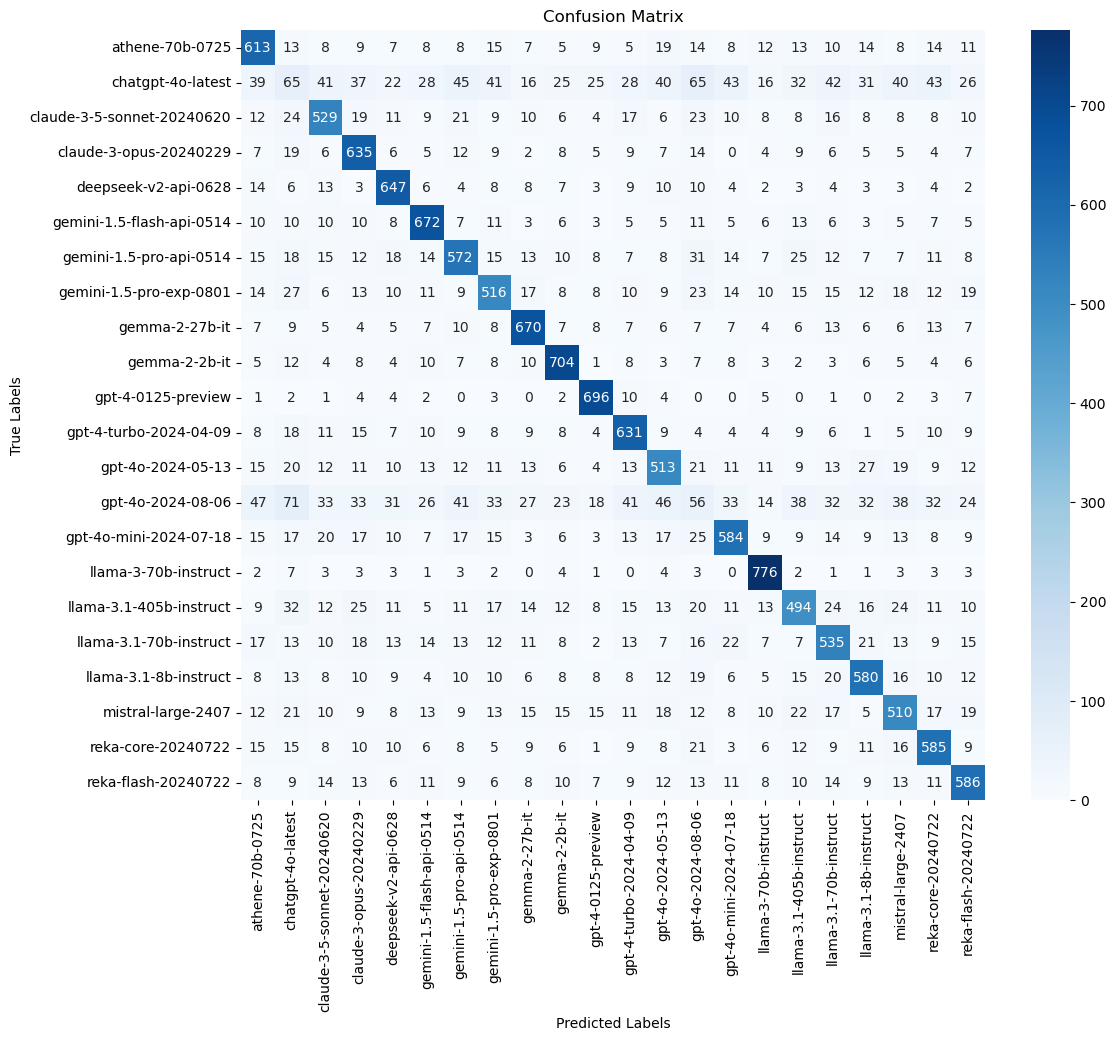

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_binarizer.classes_, yticklabels=label_binarizer.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


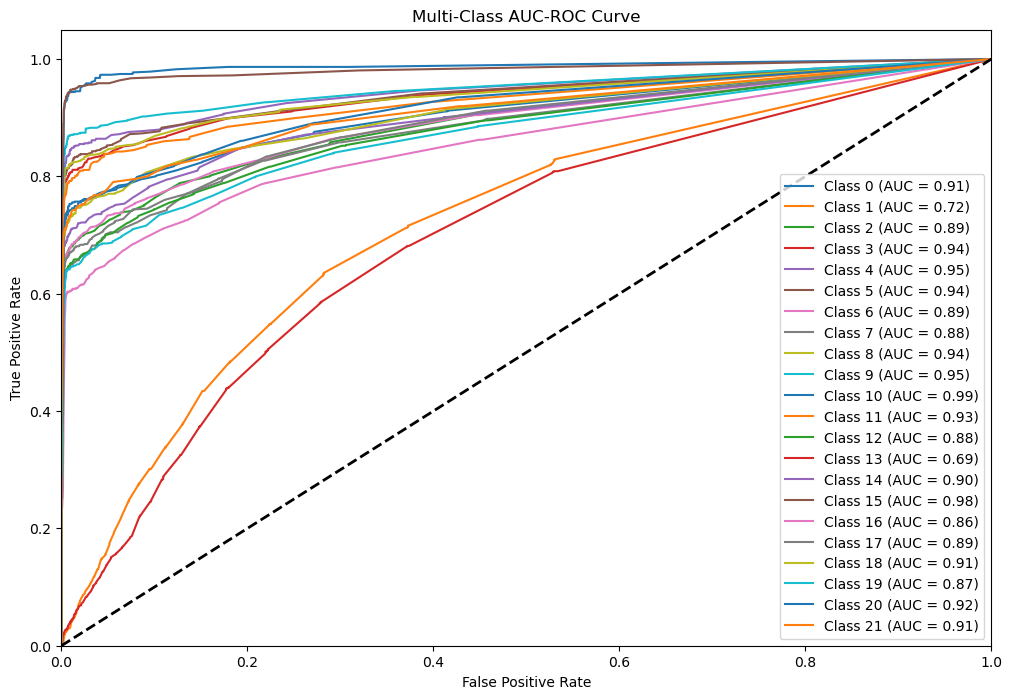

In [44]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Binarize the labels
label_binarizer = LabelBinarizer()
y_test_binarized = label_binarizer.fit_transform(y_test)

# Train a One-vs-Rest Random Forest classifier
ovr_rf_model = OneVsRestClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
y_score = ovr_rf_model.fit(X_train, y_train).predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(label_binarizer.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the AUC-ROC curve for each class
plt.figure(figsize=(12, 8))
for i in range(len(label_binarizer.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'Class {label_binarizer.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class AUC-ROC Curve')
plt.legend(loc='lower right')
plt.show()


Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Overall Accuracy of Tuned Random Forest Classifier: 0.69
Classification Report:
                            precision    recall  f1-score   support

           athene-70b-0725       0.70      0.74      0.72       830
         chatgpt-4o-latest       0.16      0.09      0.11       790
claude-3-5-sonnet-20240620       0.67      0.68      0.68       776
    claude-3-opus-20240229       0.70      0.81      0.75       784
      deepseek-v2-api-0628       0.75      0.84      0.79       773
 gemini-1.5-flash-api-0514       0.77      0.82      0.79       821
   gemini-1.5-pro-api-0514       0.69      0.68      0.68       847
   gemini-1.5-pro-exp-0801       0.67      0.65      0.66       796
            gemma-2-27b-it       0.77      0.82      0.79       822
             gemma-2-2b-it       0.79      0.85     

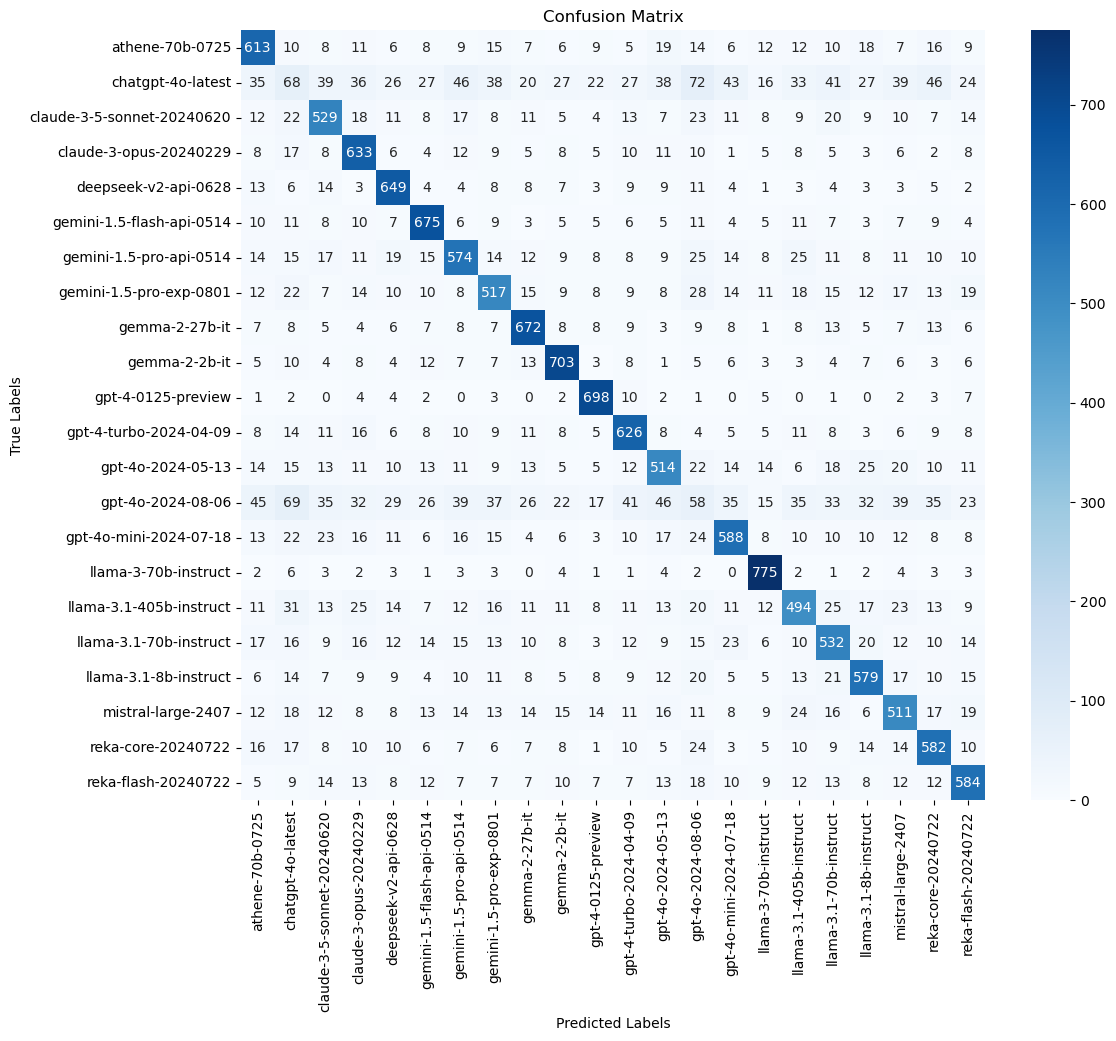

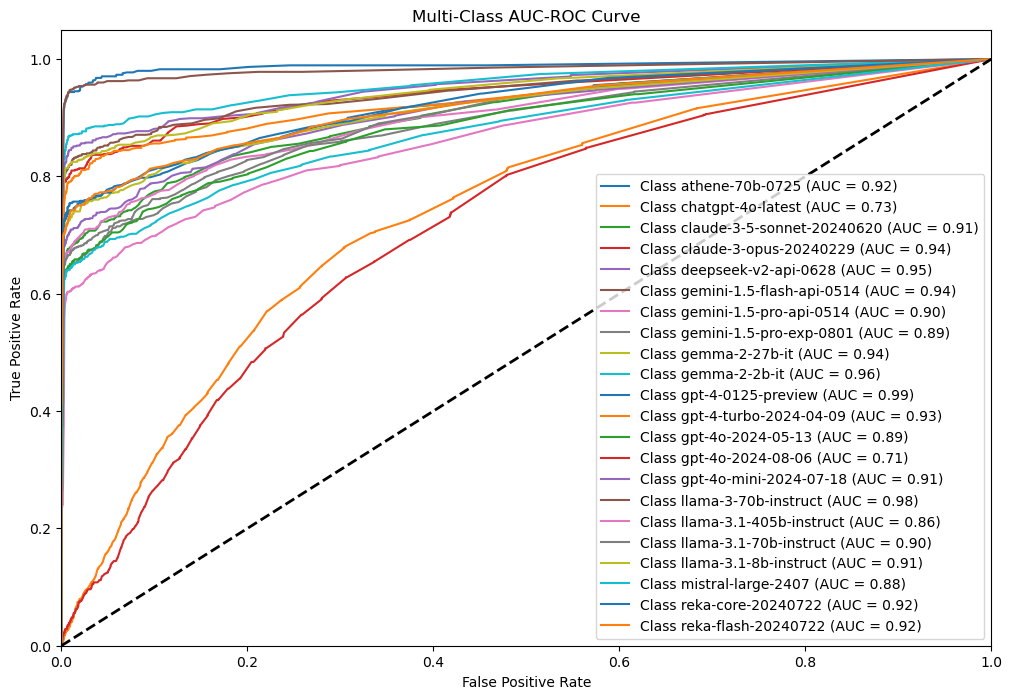

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc

# Load the dataset
resampled_data = pd.read_csv(r"C:\Users\yoges\DM project\final_dataset1.csv")

# Data preprocessing
label_encoder = LabelEncoder()
resampled_data['language'] = label_encoder.fit_transform(resampled_data['language'])

# Define features (X) and target (y)
X = resampled_data.drop(columns=['model', 'tstamp_period', 'dedup_tag_high_freq', 'dedup_tag_sampled', 'is_refusal'])
y = resampled_data['model']

# Binarize the target labels
label_binarizer = LabelBinarizer()
y_binarized = label_binarizer.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binarized, test_size=0.2, random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the base model
base_model = RandomForestClassifier(random_state=42)

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=base_model, param_grid=param_grid, 
                           scoring='accuracy', cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train[:, 0])  # Using the first target class for tuning

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the One-vs-Rest model using the best parameters
classifiers = {}
for i, class_name in enumerate(label_binarizer.classes_):
    clf = RandomForestClassifier(**best_params, random_state=42)
    clf.fit(X_train, y_train[:, i])
    classifiers[class_name] = clf

# Collect probability scores for each class on the test set
probabilities = {}
for class_name, clf in classifiers.items():
    probabilities[class_name] = clf.predict_proba(X_test)[:, 1]

# Choose the class with the highest probability for each instance
predicted_classes = [max(probabilities, key=lambda class_name: probabilities[class_name][i])
                     for i in range(len(X_test))]

# Convert the binarized true labels back to the original class labels
true_classes = label_binarizer.inverse_transform(y_test)

# Calculate the overall accuracy
overall_accuracy = accuracy_score(true_classes, predicted_classes)
print(f"Overall Accuracy of Tuned Random Forest Classifier: {overall_accuracy:.2f}")

# Generate the classification report
print("Classification Report:")
print(classification_report(true_classes, predicted_classes))

# Generate and plot the confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_binarizer.classes_, yticklabels=label_binarizer.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Plot the AUC-ROC curves for each class
y_score = OneVsRestClassifier(RandomForestClassifier(**best_params, random_state=42)).fit(X_train, y_train).predict_proba(X_test)
fpr, tpr, roc_auc = {}, {}, {}
for i in range(len(label_binarizer.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(12, 8))
for i in range(len(label_binarizer.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'Class {label_binarizer.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class AUC-ROC Curve')
plt.legend(loc='lower right')
plt.show()


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters for XGBoost: {'subsample': 1.0, 'scale_pos_weight': 2, 'reg_lambda': 10, 'reg_alpha': 0.1, 'n_estimators': 700, 'min_child_weight': 1, 'max_depth': 15, 'learning_rate': 0.3, 'gamma': 0, 'colsample_bytree': 1.0}
Overall Accuracy of Tuned XGBoost Classifier: 0.68
Classification Report:
                            precision    recall  f1-score   support

           athene-70b-0725       0.69      0.73      0.71       830
         chatgpt-4o-latest       0.17      0.10      0.12       790
claude-3-5-sonnet-20240620       0.66      0.66      0.66       776
    claude-3-opus-20240229       0.71      0.80      0.75       784
      deepseek-v2-api-0628       0.75      0.80      0.78       773
 gemini-1.5-flash-api-0514       0.74      0.80      0.77       821
   gemini-1.5-pro-api-0514       0.69      0.67      0.68       847
   gemini-1.5-pro-exp-0801       0.64      0.63      0.64       796
            gemma-2-27b

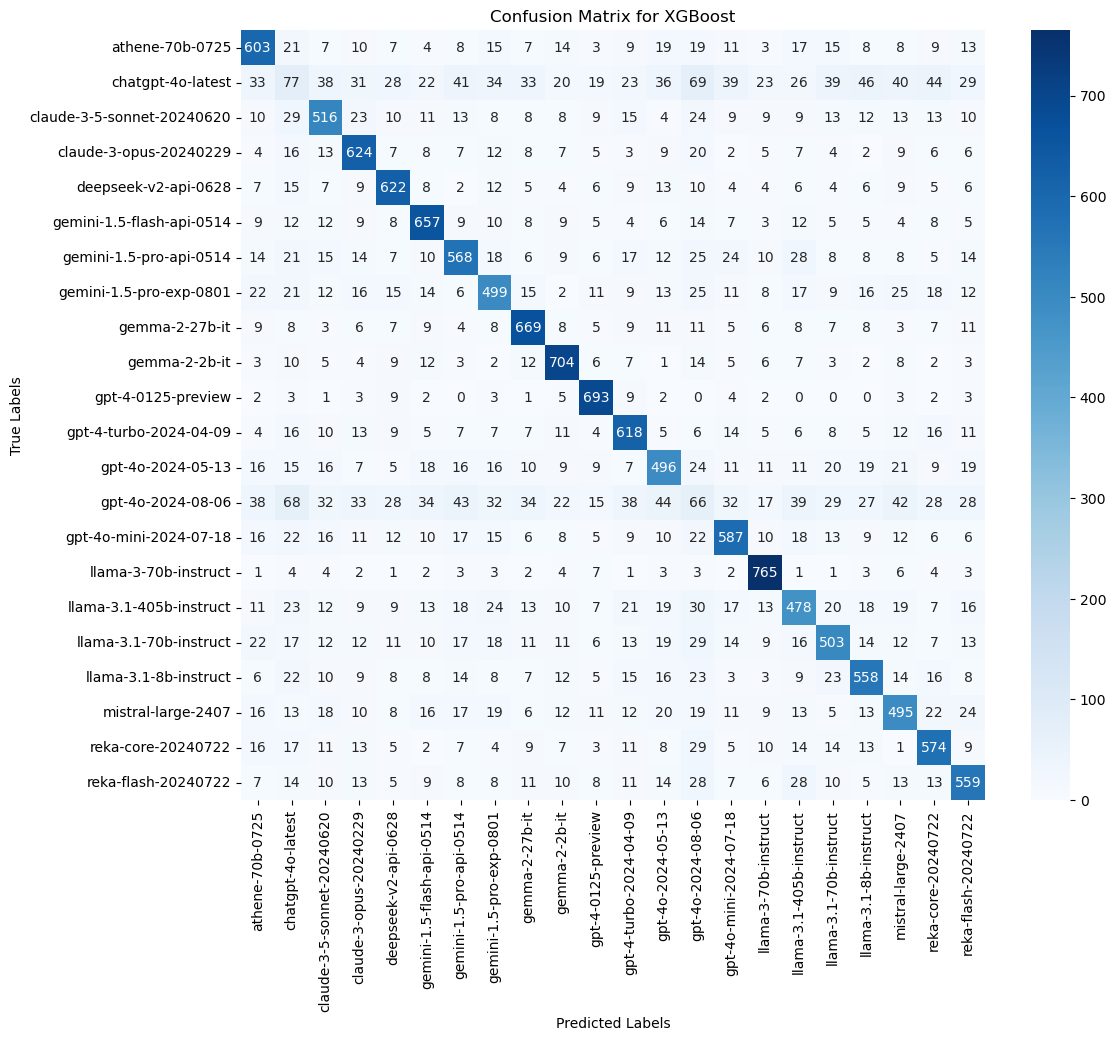

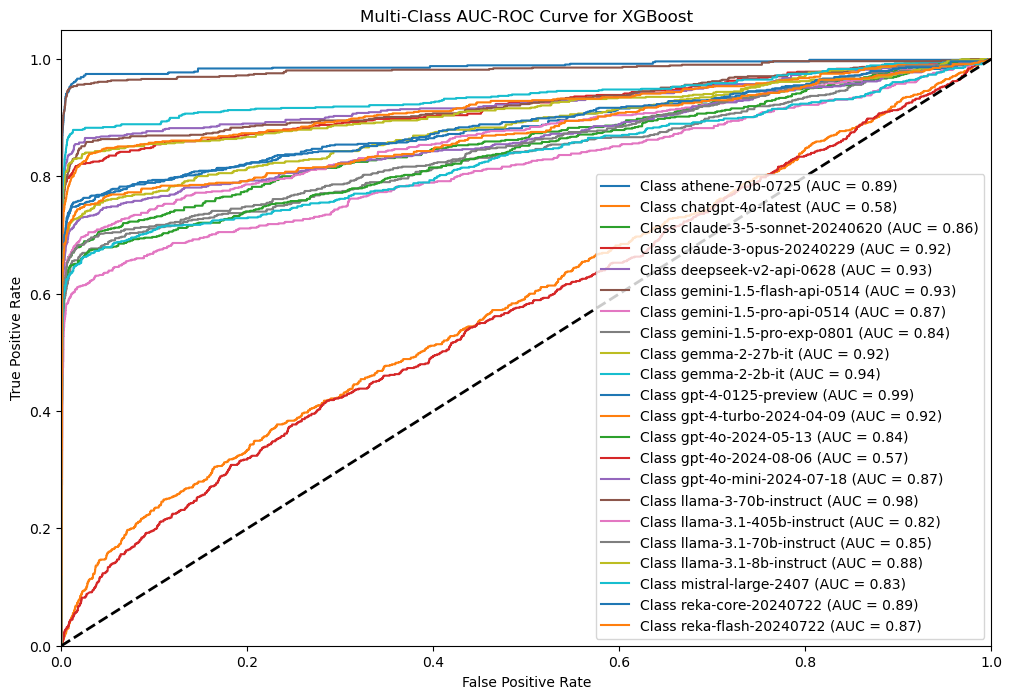

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
import numpy as np

# Load the dataset
resampled_data = pd.read_csv(r"C:\Users\yoges\DM project\final_dataset1.csv")

# Data preprocessing
label_encoder = LabelEncoder()
resampled_data['language'] = label_encoder.fit_transform(resampled_data['language'])

# Define features (X) and target (y)
X = resampled_data.drop(columns=['model', 'tstamp_period', 'dedup_tag_high_freq', 'dedup_tag_sampled', 'is_refusal'])
y = resampled_data['model']

# Binarize the target labels
label_binarizer = LabelBinarizer()
y_binarized = label_binarizer.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binarized, test_size=0.2, random_state=42)

# New hyperparameter space for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 300, 500, 700, 1000],
    'learning_rate': np.linspace(0.01, 0.3, 15),  # More learning rates for finer granularity
    'max_depth': [3, 5, 7, 9, 11, 13, 15],  # Deeper trees to capture more complexity
    'min_child_weight': [1, 3, 5, 7],  # Minimum sum of weights for a child
    'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5],  # Minimum loss reduction
    'subsample': np.linspace(0.5, 1.0, 6),  # Fraction of samples used for fitting
    'colsample_bytree': np.linspace(0.5, 1.0, 6),  # Fraction of features used per tree
    'reg_alpha': [0, 0.1, 0.5, 1, 2, 5, 10],  # L1 regularization term
    'reg_lambda': [0, 0.1, 0.5, 1, 2, 5, 10],  # L2 regularization term
    'scale_pos_weight': [1, 2, 3, 5, 10]  # Balancing positive and negative weights
}

# Initialize the base XGBoost model
base_model = XGBClassifier(eval_metric='mlogloss', random_state=42)

# Perform hyperparameter tuning using RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=base_model,
    param_distributions=param_dist,
    n_iter=100,  # Increase the number of iterations for a more thorough search
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit RandomizedSearchCV on the training data using the first class
random_search.fit(X_train, y_train[:, 0])

# Get the best parameters from RandomizedSearchCV
best_params = random_search.best_params_
print(f"Best Parameters for XGBoost: {best_params}")

# Train the One-vs-Rest model using the best parameters
classifiers = {}
for i, class_name in enumerate(label_binarizer.classes_):
    clf = XGBClassifier(**best_params, eval_metric='mlogloss', random_state=42)
    clf.fit(X_train, y_train[:, i])
    classifiers[class_name] = clf

# Collect probability scores for each class on the test set
probabilities = {}
for class_name, clf in classifiers.items():
    probabilities[class_name] = clf.predict_proba(X_test)[:, 1]

# Choose the class with the highest probability for each instance
predicted_classes = [max(probabilities, key=lambda class_name: probabilities[class_name][i])
                     for i in range(len(X_test))]

# Convert the binarized true labels back to the original class labels
true_classes = label_binarizer.inverse_transform(y_test)

# Calculate the overall accuracy
overall_accuracy = accuracy_score(true_classes, predicted_classes)
print(f"Overall Accuracy of Tuned XGBoost Classifier: {overall_accuracy:.2f}")

# Generate the classification report
print("Classification Report:")
print(classification_report(true_classes, predicted_classes))

# Generate and plot the confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_binarizer.classes_, yticklabels=label_binarizer.classes_)
plt.title('Confusion Matrix for XGBoost')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Plot the AUC-ROC curves for each class
y_score = OneVsRestClassifier(XGBClassifier(**best_params, eval_metric='mlogloss', random_state=42)).fit(X_train, y_train).predict_proba(X_test)
fpr, tpr, roc_auc = {}, {}, {}
for i in range(len(label_binarizer.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(12, 8))
for i in range(len(label_binarizer.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'Class {label_binarizer.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class AUC-ROC Curve for XGBoost')
plt.legend(loc='lower right')
plt.show()


In [61]:
!pip install catboost


   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB 660.6 kB/s eta 0:02:34
   ---------------------------------------- 0.2/101.7 MB 2.8 MB/s eta 0:00:37
   ---------------------------------------- 1.0/101.7 MB 8.3 MB/s eta 0:00:13
    --------------------------------------- 2.1/101.7 MB 13.3 MB/s eta 0:00:08
   - -------------------------------------- 3.1/101.7 MB 15.4 MB/s eta 0:00:07
   - -------------------------------------- 4.2/101.7 MB 16.7 MB/s eta 0:00:06
   -- ------------------------------------- 5.2/101.7 MB 16.8 MB/s eta 0:00:06
   -- ------------------------------------- 6.3/101.7 MB 17.5 MB/s eta 0:00:06
   -- ------------------------------------- 6.9/101.7 MB 16.9 MB/s eta 0:00:06
   --- ------------------------------------ 8.3/101.7 MB 17.6 MB/s eta 0:00:06
   --- ------------------------------------ 8.4/101.7 MB 17.9 MB/s eta 0:00:06
   --- ------------------------------------ 8.4/101.7 MB 17.9

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters for CatBoost: {'learning_rate': 0.1388888888888889, 'l2_leaf_reg': 3, 'iterations': 1000, 'depth': 10, 'border_count': 128, 'bagging_temperature': 3}
Overall Accuracy of Tuned CatBoost Classifier: 0.66
Classification Report:
                            precision    recall  f1-score   support

           athene-70b-0725       0.69      0.72      0.71       830
         chatgpt-4o-latest       0.16      0.10      0.12       790
claude-3-5-sonnet-20240620       0.62      0.64      0.63       776
    claude-3-opus-20240229       0.71      0.77      0.74       784
      deepseek-v2-api-0628       0.72      0.77      0.75       773
 gemini-1.5-flash-api-0514       0.74      0.78      0.76       821
   gemini-1.5-pro-api-0514       0.66      0.64      0.65       847
   gemini-1.5-pro-exp-0801       0.62      0.61      0.62       796
            gemma-2-27b-it       0.72      0.80      0.76       822
             gem

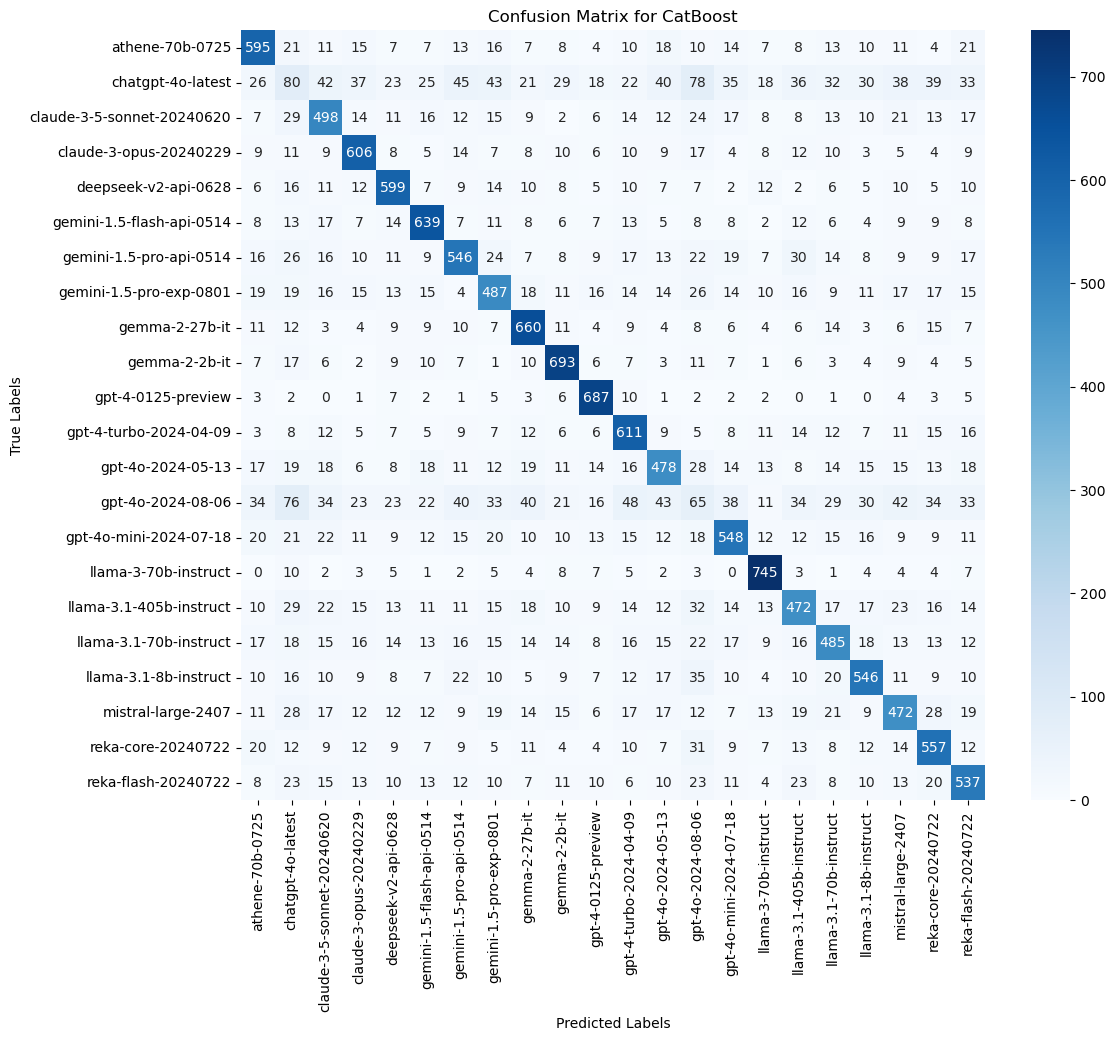

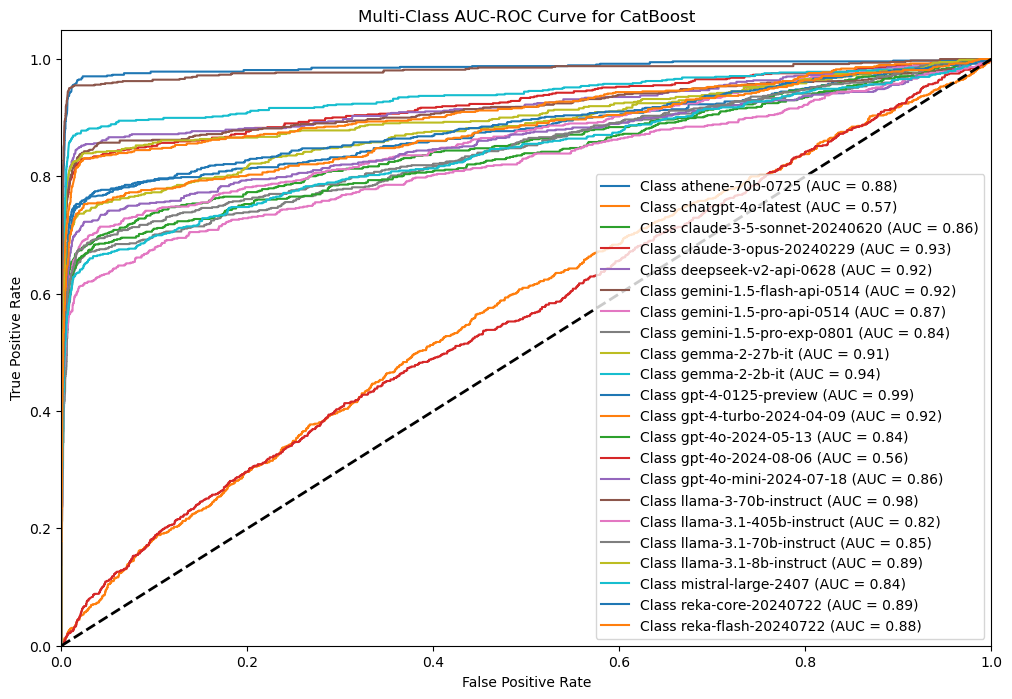

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
import numpy as np

# Load the dataset
resampled_data = pd.read_csv(r"C:\Users\yoges\DM project\final_dataset1.csv")

# Data preprocessing
label_encoder = LabelEncoder()
resampled_data['language'] = label_encoder.fit_transform(resampled_data['language'])

# Define features (X) and target (y)
X = resampled_data.drop(columns=['model', 'tstamp_period', 'dedup_tag_high_freq', 'dedup_tag_sampled', 'is_refusal'])
y = resampled_data['model']

# Binarize the target labels
label_binarizer = LabelBinarizer()
y_binarized = label_binarizer.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binarized, test_size=0.2, random_state=42)

# Define the hyperparameter space for CatBoost
param_dist = {
    'iterations': [100, 200, 500, 1000],
    'learning_rate': np.linspace(0.01, 0.3, 10),
    'depth': [4, 6, 8, 10],
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'border_count': [32, 64, 128],  # Number of splits for numerical features
    'bagging_temperature': [0, 0.5, 1, 2, 3]  # Controls the amount of randomness
}

# Initialize the CatBoost model
base_model = CatBoostClassifier(auto_class_weights='Balanced', random_seed=42, silent=True)

# Perform hyperparameter tuning using RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=base_model,
    param_distributions=param_dist,
    n_iter=50,  # Number of iterations for random search
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit RandomizedSearchCV on the training data using the first class
random_search.fit(X_train, y_train[:, 0])

# Get the best parameters from RandomizedSearchCV
best_params = random_search.best_params_
print(f"Best Parameters for CatBoost: {best_params}")

# Train the One-vs-Rest model using the best parameters
classifiers = {}
for i, class_name in enumerate(label_binarizer.classes_):
    clf = CatBoostClassifier(**best_params, auto_class_weights='Balanced', random_seed=42, silent=True)
    clf.fit(X_train, y_train[:, i])
    classifiers[class_name] = clf

# Collect probability scores for each class on the test set
probabilities = {}
for class_name, clf in classifiers.items():
    probabilities[class_name] = clf.predict_proba(X_test)[:, 1]

# Choose the class with the highest probability for each instance
predicted_classes = [max(probabilities, key=lambda class_name: probabilities[class_name][i])
                     for i in range(len(X_test))]

# Convert the binarized true labels back to the original class labels
true_classes = label_binarizer.inverse_transform(y_test)

# Calculate the overall accuracy
overall_accuracy = accuracy_score(true_classes, predicted_classes)
print(f"Overall Accuracy of Tuned CatBoost Classifier: {overall_accuracy:.2f}")

# Generate the classification report
print("Classification Report:")
print(classification_report(true_classes, predicted_classes))

# Generate and plot the confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_binarizer.classes_, yticklabels=label_binarizer.classes_)
plt.title('Confusion Matrix for CatBoost')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Plot the AUC-ROC curves for each class
y_score = OneVsRestClassifier(CatBoostClassifier(**best_params, auto_class_weights='Balanced', random_seed=42, silent=True)).fit(X_train, y_train).predict_proba(X_test)
fpr, tpr, roc_auc = {}, {}, {}
for i in range(len(label_binarizer.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(12, 8))
for i in range(len(label_binarizer.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'Class {label_binarizer.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class AUC-ROC Curve for CatBoost')
plt.legend(loc='lower right')
plt.show()


In [67]:
pip install lightgbm


   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB 660.6 kB/s eta 0:00:03
   ----- ---------------------------------- 0.2/1.4 MB 2.5 MB/s eta 0:00:01
   --------------------------------- ------ 1.2/1.4 MB 8.6 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 9.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Fitting 5 folds for each of 150 candidates, totalling 750 fits
Best Parameters for LightGBM: {'subsample': 0.5526315789473684, 'reg_lambda': 0, 'reg_alpha': 0, 'num_leaves': 150, 'n_estimators': 2000, 'min_split_gain': 0, 'min_child_samples': 15, 'max_depth': 35, 'learning_rate': 0.12105263157894737, 'colsample_bytree': 0.6052631578947368}
Overall Accuracy of Tuned LightGBM Classifier: 0.68
Classification Report:
                            precision    recall  f1-score   support

           athene-70b-0725       0.73      0.73      0.73       830
         chatgpt-4o-latest       0.18      0.14      0.16       790
claude-3-5-sonnet-20240620       0.67      0.67      0.67       776
    claude-3-opus-20240229       0.72      0.80      0.76       784
      deepseek-v2-api-0628       0.78      0.82      0.80       773
 gemini-1.5-flash-api-0514       0.76      0.80      0.78       821
   gemini-1.5-pro-api-0514       0.67      0.67      0.67       847
   gemini-1.5-pro-exp-0801       0.64 

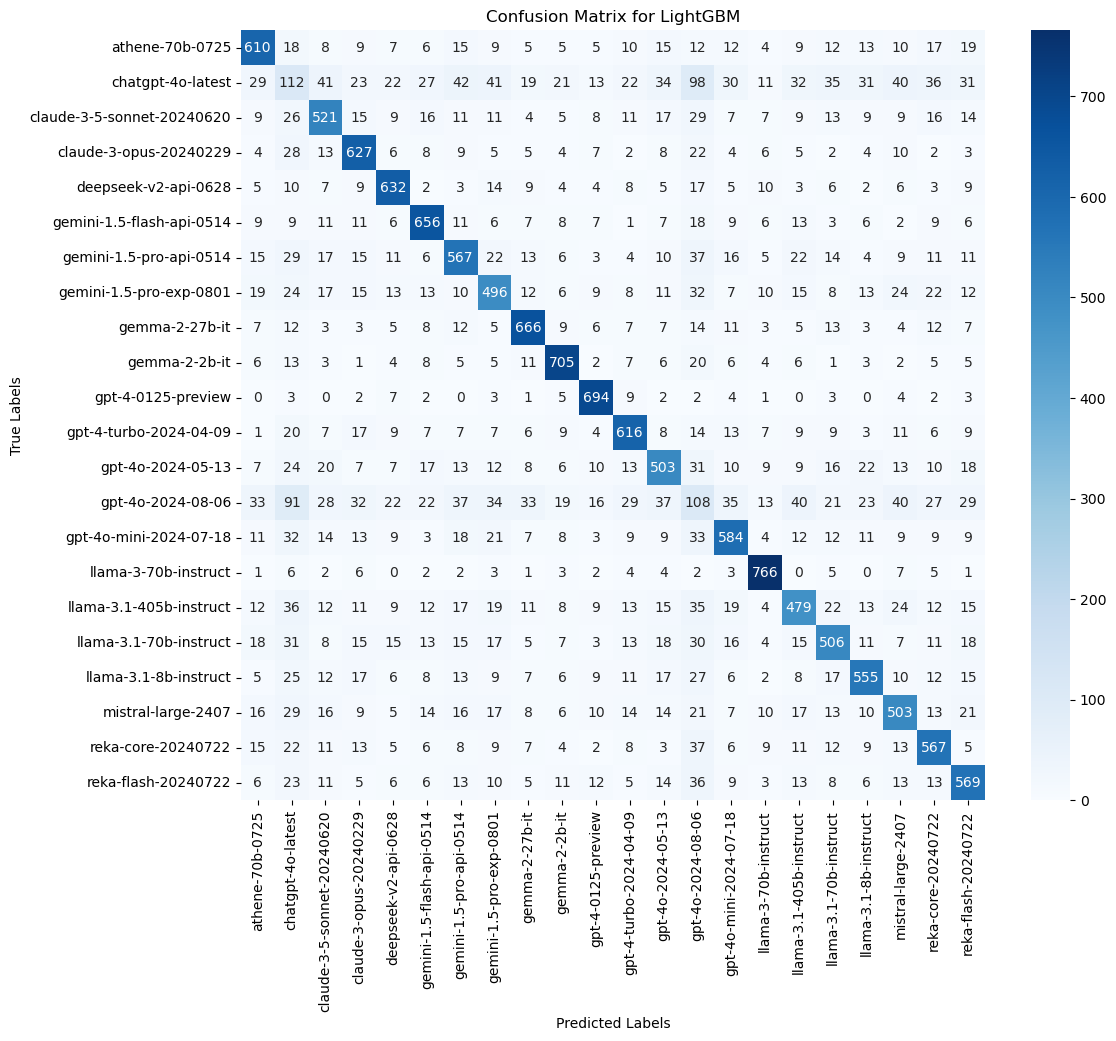

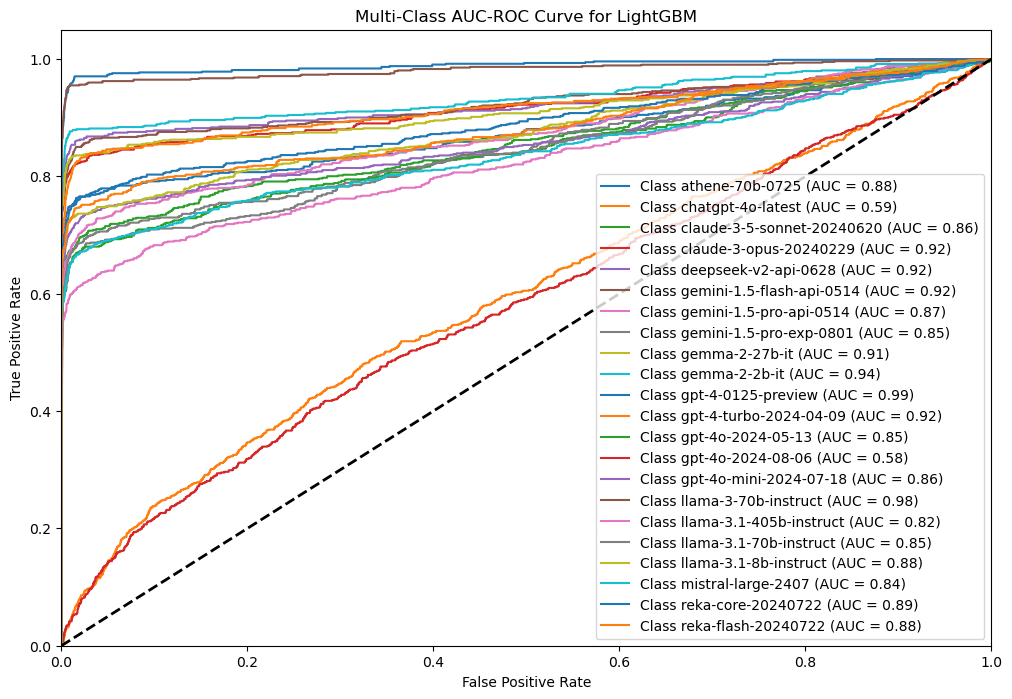

In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
import numpy as np

# Load the dataset
resampled_data = pd.read_csv(r"C:\Users\yoges\DM project\final_dataset1.csv")

# Data preprocessing
label_encoder = LabelEncoder()
resampled_data['language'] = label_encoder.fit_transform(resampled_data['language'])

# Define features (X) and target (y)
X = resampled_data.drop(columns=['model', 'tstamp_period', 'dedup_tag_high_freq', 'dedup_tag_sampled', 'is_refusal'])
y = resampled_data['model']

# Binarize the target labels
label_binarizer = LabelBinarizer()
y_binarized = label_binarizer.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binarized, test_size=0.2, random_state=42)

# Expanded hyperparameter space for further tuning
param_dist = {
    'num_leaves': [150, 200, 250, 300],
    'max_depth': [25, 30, 35, 40],
    'learning_rate': np.linspace(0.1, 0.5, 20),
    'n_estimators': [1000, 1200, 1500, 2000],
    'min_child_samples': [1, 5, 10, 15],
    'subsample': np.linspace(0.5, 1.0, 20),
    'colsample_bytree': np.linspace(0.5, 1.0, 20),
    'reg_alpha': [0, 1, 5, 10, 20],  # L1 regularization
    'reg_lambda': [0, 5, 10, 15, 20],  # L2 regularization
    'min_split_gain': [0, 0.1, 0.3, 0.5, 0.7]  # Minimum loss reduction required for a split
}

# Initialize the LightGBM model
base_model = LGBMClassifier(random_state=42)

# Perform hyperparameter tuning using RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=base_model,
    param_distributions=param_dist,
    n_iter=150,  # Increase the number of iterations for a more thorough search
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation for more robust evaluation
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit RandomizedSearchCV on the training data using the first class
random_search.fit(X_train, y_train[:, 0])

# Get the best parameters from RandomizedSearchCV
best_params = random_search.best_params_
print(f"Best Parameters for LightGBM: {best_params}")

# Train the One-vs-Rest model using the best parameters
classifiers = {}
for i, class_name in enumerate(label_binarizer.classes_):
    clf = LGBMClassifier(**best_params, random_state=42)
    clf.fit(X_train, y_train[:, i])
    classifiers[class_name] = clf

# Collect probability scores for each class on the test set
probabilities = {}
for class_name, clf in classifiers.items():
    probabilities[class_name] = clf.predict_proba(X_test)[:, 1]

# Choose the class with the highest probability for each instance
predicted_classes = [max(probabilities, key=lambda class_name: probabilities[class_name][i])
                     for i in range(len(X_test))]

# Convert the binarized true labels back to the original class labels
true_classes = label_binarizer.inverse_transform(y_test)

# Calculate the overall accuracy
overall_accuracy = accuracy_score(true_classes, predicted_classes)
print(f"Overall Accuracy of Tuned LightGBM Classifier: {overall_accuracy:.2f}")

# Generate the classification report
print("Classification Report:")
print(classification_report(true_classes, predicted_classes))

# Generate and plot the confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_binarizer.classes_, yticklabels=label_binarizer.classes_)
plt.title('Confusion Matrix for LightGBM')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Plot the AUC-ROC curves for each class
y_score = OneVsRestClassifier(LGBMClassifier(**best_params, random_state=42)).fit(X_train, y_train).predict_proba(X_test)
fpr, tpr, roc_auc = {}, {}, {}
for i in range(len(label_binarizer.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(12, 8))
for i in range(len(label_binarizer.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'Class {label_binarizer.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class AUC-ROC Curve for LightGBM')
plt.legend(loc='lower right')
plt.show()


[LightGBM] [Info] Number of positive: 3170, number of negative: 67230
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003482 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 920
[LightGBM] [Info] Number of data points in the train set: 70400, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.045028 -> initscore=-3.054388
[LightGBM] [Info] Start training from score -3.054388
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 3210, number of negative: 67190
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003519 seconds.
You can set `force_row_wise=true` to remove t

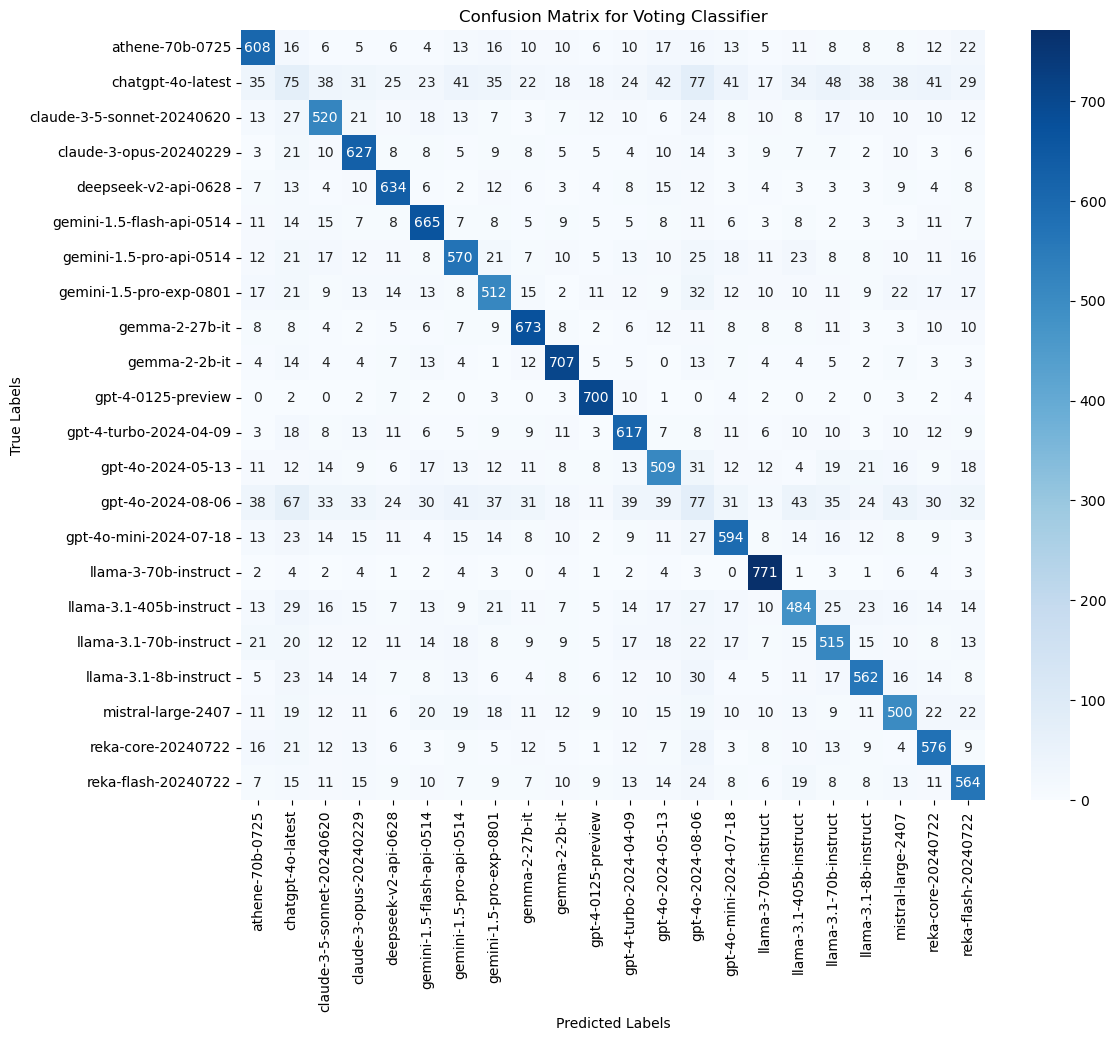

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
resampled_data = pd.read_csv(r"C:\Users\yoges\DM project\final_dataset1.csv")

# Data preprocessing
label_encoder = LabelEncoder()
resampled_data['language'] = label_encoder.fit_transform(resampled_data['language'])

# Define features (X) and target (y)
X = resampled_data.drop(columns=['model', 'tstamp_period', 'dedup_tag_high_freq', 'dedup_tag_sampled', 'is_refusal'])
y = resampled_data['model']

# Binarize the target labels
label_binarizer = LabelBinarizer()
y_binarized = label_binarizer.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binarized, test_size=0.2, random_state=42)

# Initialize individual models with optimal hyperparameters (or default for simplicity)
lgbm_model = LGBMClassifier(num_leaves=150, n_estimators=1000, max_depth=25, learning_rate=0.3, random_state=42)
catboost_model = CatBoostClassifier(iterations=1000, learning_rate=0.3, depth=10, random_seed=42, silent=True)
xgb_model = XGBClassifier(n_estimators=1000, learning_rate=0.3, max_depth=10, random_state=42)

# Create the Voting Classifier
voting_clf = VotingClassifier(
    estimators=[
        ('lgbm', lgbm_model),
        ('catboost', catboost_model),
        ('xgb', xgb_model)
    ],
    voting='soft'  # Use soft voting to consider the probabilities of each class
)

# Train the Voting Classifier for each class in a One-vs-Rest fashion
classifiers = {}
for i, class_name in enumerate(label_binarizer.classes_):
    clf = VotingClassifier(
        estimators=[
            ('lgbm', LGBMClassifier(num_leaves=150, n_estimators=1000, max_depth=25, learning_rate=0.3, random_state=42)),
            ('catboost', CatBoostClassifier(iterations=1000, learning_rate=0.3, depth=10, random_seed=42, silent=True)),
            ('xgb', XGBClassifier(n_estimators=1000, learning_rate=0.3, max_depth=10, random_state=42))
        ],
        voting='soft'
    )
    clf.fit(X_train, y_train[:, i])
    classifiers[class_name] = clf

# Collect probability scores for each class on the test set
probabilities = {}
for class_name, clf in classifiers.items():
    probabilities[class_name] = clf.predict_proba(X_test)[:, 1]

# Choose the class with the highest probability for each instance
predicted_classes = [max(probabilities, key=lambda class_name: probabilities[class_name][i])
                     for i in range(len(X_test))]

# Convert the binarized true labels back to the original class labels
true_classes = label_binarizer.inverse_transform(y_test)

# Calculate the overall accuracy
overall_accuracy = accuracy_score(true_classes, predicted_classes)
print(f"Overall Accuracy of Voting Classifier: {overall_accuracy:.2f}")

# Generate the classification report
print("Classification Report:")
print(classification_report(true_classes, predicted_classes))

# Generate and plot the confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_binarizer.classes_, yticklabels=label_binarizer.classes_)
plt.title('Confusion Matrix for Voting Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
